# Task 1


In [5]:
pip install nltk vaderSentiment wordcloud matplotlib pandas

SyntaxError: invalid syntax (644952756.py, line 1)

In [6]:
pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# import data from https://www.airlinequality.com/airline-reviews/british-airways
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")
df = pd.DataFrame()
df["reviews"] = reviews
df.to_csv("data/BA_reviews.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\777\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\777\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\777\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\777\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\777\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
# Function to clean the text
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)

# Function for tokenization, POS tagging, and stopwords removal
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

# POS tagger dictionary
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}

# Apply tokenization, POS tagging, and stopwords removal
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)

# Function for lemmatization
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

# Apply lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
df['Lemma'] = df['POS tagged'].apply(lemmatize)

# Sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

# Function to calculate VADER sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# Apply VADER sentiment analysis
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# Function to categorize sentiments
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
df['Analysis'] = df['Sentiment'].apply(vader_analysis)

df

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | Boarding was difficult caus...,Trip Verified Boarding was difficult caused b...,"[(Trip, n), (Verified, n), (Boarding, n), (dif...",Trip Verified Boarding difficult cause vast ...,0.9343,Positive
1,✅ Trip Verified | Boarding started with a del...,Trip Verified Boarding started with a delay o...,"[(Trip, n), (Verified, n), (Boarding, n), (sta...",Trip Verified Boarding start delay minute ev...,0.9509,Positive
2,✅ Trip Verified | Absolutely horrible custome...,Trip Verified Absolutely horrible customer se...,"[(Trip, n), (Verified, n), (Absolutely, n), (h...",Trip Verified Absolutely horrible customer s...,-0.7680,Negative
3,Not Verified | BA is not what it used to be! ...,Not Verified BA is not what it used to be As m...,"[(Verified, n), (BA, n), (used, v), (much, a),...",Verified BA use much like onboard crew check...,0.9532,Positive
4,"✅ Trip Verified | BA First, it's not even the...",Trip Verified BA First it s not even the best...,"[(Trip, n), (Verified, n), (BA, n), (First, n)...",Trip Verified BA First even best business cl...,0.4148,Neutral
...,...,...,...,...,...,...
995,✅ Trip Verified | London to Vancouver. Check ...,Trip Verified London to Vancouver Check in ag...,"[(Trip, n), (Verified, n), (London, n), (Vanco...",Trip Verified London Vancouver Check agent h...,0.9753,Positive
996,✅ Trip Verified | The First Class zone at Heat...,Trip Verified The First Class zone at Heathro...,"[(Trip, n), (Verified, v), (First, n), (Class,...",Trip Verified First Class zone Heathrow Conc...,0.7269,Positive
997,✅ Trip Verified | I had a miserable experienc...,Trip Verified I had a miserable experience in...,"[(Trip, n), (Verified, n), (miserable, a), (ex...",Trip Verified miserable experience first cla...,-0.9122,Negative
998,✅ Trip Verified | Leeds Bradford to Las Vegas...,Trip Verified Leeds Bradford to Las Vegas via...,"[(Trip, n), (Verified, n), (Leeds, n), (Bradfo...",Trip Verified Leeds Bradford Las Vegas via H...,0.8658,Positive


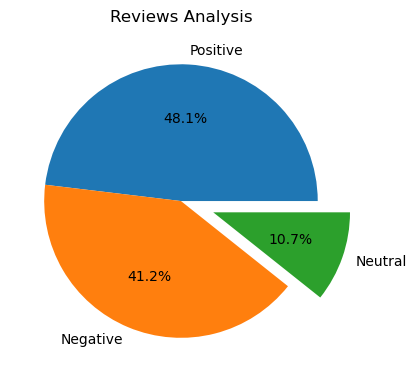

In [11]:
# Visual representation - Pie chart
vader_counts = df['Analysis'].value_counts()

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Save the processed DataFrame to a CSV file
df.to_csv("Processed_reviews.csv")

# Word Cloud
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=25,
        scale=3,
        random_state=1)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

# Display the Word Cloud
show_wordcloud(df.Lemma)